In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

athletes_df = pd.read_csv('data_files/athlete_events.csv')
regions_df = pd.read_csv('data_files/noc_regions.csv')
data = pd.merge(athletes_df, regions_df, how='left', on='NOC')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [3]:
# Cleaning up DataFrame
data.drop(['Team', 'NOC', 'Games', 'City', 'Event', 'notes'], axis=1, inplace=True)
data.rename(columns = {'region':'Country'}, inplace = True)

# Replace null values
data['Medal'].fillna('None', inplace = True)
data['Height'].fillna(0, inplace = True)
data['Weight'].fillna(0, inplace = True)
data['Age'].fillna(0, inplace = True)
data = data.drop_duplicates()
print(len(data))
data.head()

199161


,ID,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,1992,Summer,Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,2012,Summer,Judo,None,China
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,1920,Summer,Football,None,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,1900,Summer,Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,1988,Winter,Speed Skating,None,Netherlands


In [30]:
summerGames_df = data[data['Season']=='Summer']
winterGames_df = data[data['Season']== 'Winter']
summerGames_df.head()

,ID,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,1992,Summer,Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,2012,Summer,Judo,None,China
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,1920,Summer,Football,None,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,1900,Summer,Tug-Of-War,Gold,Denmark
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,0.0,1932,Summer,Athletics,None,Netherlands


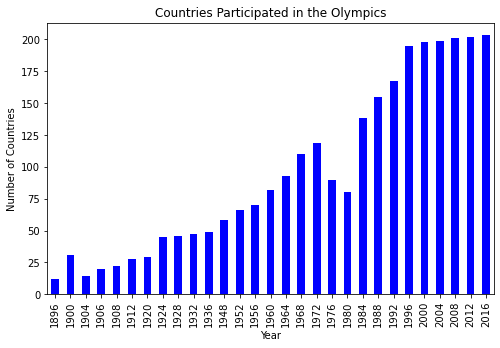

In [79]:
# Number of countries participated the Olympics (Many countries boycotted the 1980 olympics)
plt.figure(figsize=(8,5))
summerGames_df.groupby('Year')['Country'].nunique().plot(kind='bar',color='blue')
plt.xticks(rotation = 90)
plt.ylabel("Number of Countries")
plt.title("Countries Participated in the Olympics")
plt.savefig("Images/total_countries.png")
plt.show()

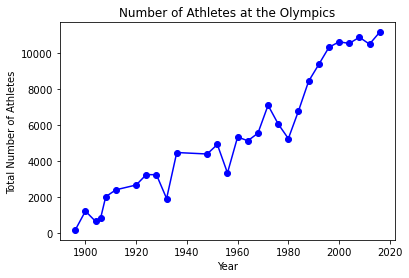

In [71]:
plt.figure
summerGames_df.groupby('Year')['ID'].nunique().plot(color='blue',marker='o')
plt.ylabel("Total Number of Athletes")
plt.title("Number of Athletes at the Olympics")
plt.savefig("Images/total_athletes.png")
plt.show()

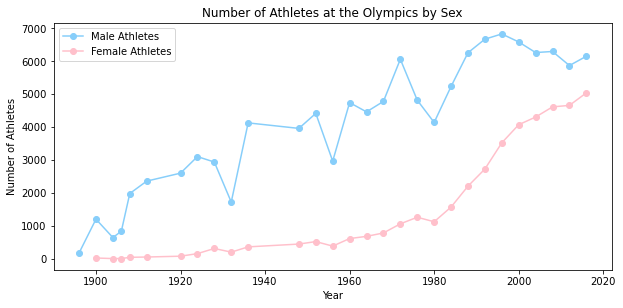

In [78]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
summerGames_df.loc[summerGames_df['Sex']=='M'].groupby('Year')['ID'].nunique().plot(color='lightskyblue',marker='o',label='Male Athletes')
summerGames_df.loc[summerGames_df['Sex']=='F'].groupby('Year')['ID'].nunique().plot(color='pink',marker='o',label='Female Athletes')
plt.ylabel("Number of Athletes")
plt.legend(loc='upper left')
plt.title("Number of Athletes at the Olympics by Sex")
plt.savefig("Images/athletes_by_sex.png")
plt.show()

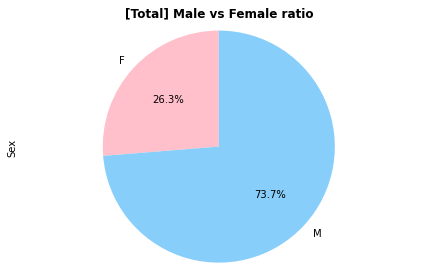

In [64]:
# Generate a pie plot showing the population of female versus male
sex = data.groupby("Sex")["Sex"].count()
colors = ["pink", "lightskyblue"]
sex_data = sex.plot(kind="pie", colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis("equal")
sex_data.set_title(label= "[Total] Male vs Female ratio", fontweight = "bold")
plt.tight_layout()
sex_data.figure.savefig("Images/male_vs_female_total.png")
plt.show()
plt.close()

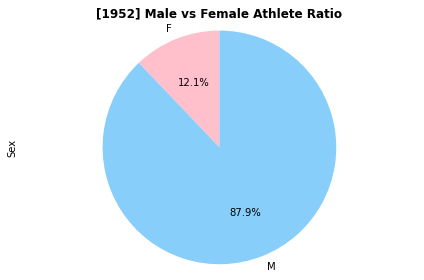

In [65]:
# (May be) Generate a pie plot showing male vs female population in early days (1952) 
old_data = data.loc[data["Year"]==1952]
sex = old_data.groupby("Sex")["Sex"].count()
colors = ["pink", "lightskyblue"]
sex_data = sex.plot(kind="pie", colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis("equal")
sex_data.set_title(label= "[1952] Male vs Female Athlete Ratio", fontweight = "bold")
plt.tight_layout()
sex_data.figure.savefig("Images/male_vs_female_1952.png")
plt.show()
plt.close()


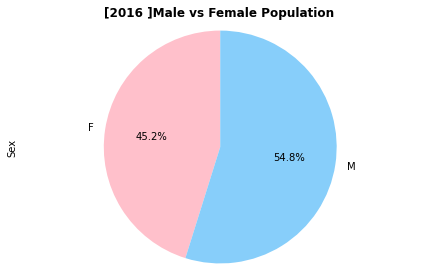

In [76]:
# Generate a pie plot showing male vs female population in recent years (2016)
old_data = data.loc[data["Year"]==2016]
sex = old_data.groupby("Sex")["Sex"].count()
colors = ["pink", "lightskyblue"]
sex_data = sex.plot(kind="pie", colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis("equal")
sex_data.set_title(label= "[2016 ]Male vs Female Population", fontweight = "bold")
plt.tight_layout()
sex_data.figure.savefig("Images/male_vs_female_2016.png")
plt.show()
plt.close()